In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
data = pd.read_csv("student_info.csv")
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [50]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


## Visualizing of data

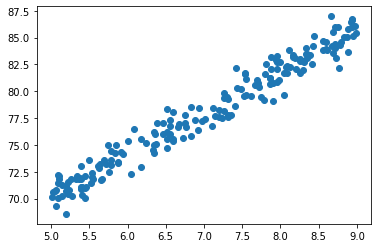

In [51]:
plt.scatter(x = data.study_hours, y = data.student_marks)
plt.show()

# Preparing data for ML model

In [52]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [53]:
data2 = data.fillna(data.mean())

In [54]:
data2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# Splitting of dataset

In [55]:
X = data2.drop("student_marks", axis="columns")
y = data2.drop("study_hours", axis="columns")
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Model training

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
model.coef_

array([[3.93571802]])

In [60]:
model.intercept_

array([50.44735504])

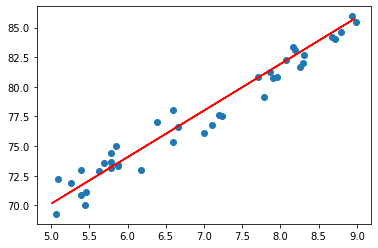

In [61]:
plt.scatter(X_test, y_test)
plt.plot(X_train, model.predict(X_train), color = "r")

# Accuracy:-

In [62]:
model.score(X_test, y_test)

0.9514124242154466

In [63]:
y_pred = model.predict(X_test)

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.0526176617137133

# Saving the model

In [44]:
import joblib
joblib.dump(model, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']